#Decision Tree Lab2
The first thing that needs to be done is to import anything that will be used for performing the Decision Tree

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

We need to load in our file that has been cleaned.

In [2]:
data = pd.read_csv("Students_Grade.csv")

Each kind of analysis needs different sorts of preprocessing to be most efficient, the following code is to check and see if everything looks ready to go.

In [3]:
print(data.head())
print(data.isnull().sum())

  Student_ID First_Name Last_Name  Gender  Age  Department  Attendance (%)  \
0      S1000       Omar  Williams       0   22           2           52.29   
1      S1001      Maria     Brown       1   18           2           97.27   
2      S1002      Ahmed     Jones       1   24           0           57.19   
3      S1003       Omar  Williams       0   24           3           95.15   
4      S1004       John     Smith       0   23           1           54.18   

   Midterm_Score  Final_Score  Assignments_Avg  ...  Projects_Score  \
0          55.03        57.82            84.22  ...           85.90   
1          97.23        45.80              NaN  ...           55.65   
2          67.05        93.68            67.70  ...           73.79   
3          47.79        80.63            66.06  ...           92.12   
4          46.59        78.89            96.85  ...           68.42   

   Total_Score  Grade  Study_Hours_per_Week  Extracurricular_Activities  \
0        56.09    0.0        

After looking at the data there are NaN values, we will handle these by using forward fill, it may not be as elegant as using the mean but it works better for when the dataset contains mixed data.

In [4]:
data = data.ffill()

Some values are still strings, an example of this is the Student_ID, we can encode this categorically because the unique ID number can be represented as unique numbers. This is not useful in all situations but in this situation it makes no difference.

In [5]:
data = pd.get_dummies(data)

Now we must set the target for analysis. The target is grades, we must remove grades from the data and ensure it is formated as a column and is set to be used as the outcome.

In [6]:
X = data.drop("Grade", axis=1)
y = data["Grade"]

Now that we have set the features and targets we have to split the data into corresponding train and test sets for X & Y. Random state makes sure that the data split is consistent across all sets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=94)

The next step is setting up the decision tree and initializing it through the training sets so we can make predictions later on.

In [8]:
model = DecisionTreeClassifier(random_state=94)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=94)

We need to have the ability to make predictions, the next line of code allows for us to set up for prediction making.

In [9]:
y_pred = model.predict(X_test)

Now that we have set the model to make predictions we can use the code to measure its performance for; Accuracy, Precision, Recall, and F-1 Score.

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Model Accuracy: 0.321

Classification Report:
              precision    recall  f1-score   support

         0.0       0.19      0.17      0.18       180
         1.0       0.31      0.31      0.31       185
         2.0       0.21      0.23      0.22       149
         3.0       0.24      0.24      0.24       185
         4.0       0.50      0.51      0.51       301

    accuracy                           0.32      1000
   macro avg       0.29      0.29      0.29      1000
weighted avg       0.32      0.32      0.32      1000



For this visualization of this tree we must now return anything that was a string back to a string so that we can run the decision tree 

In [11]:
class_names = [str(class_label) for class_label in y.unique()]

To show the plot for the decision tree we use the following code:

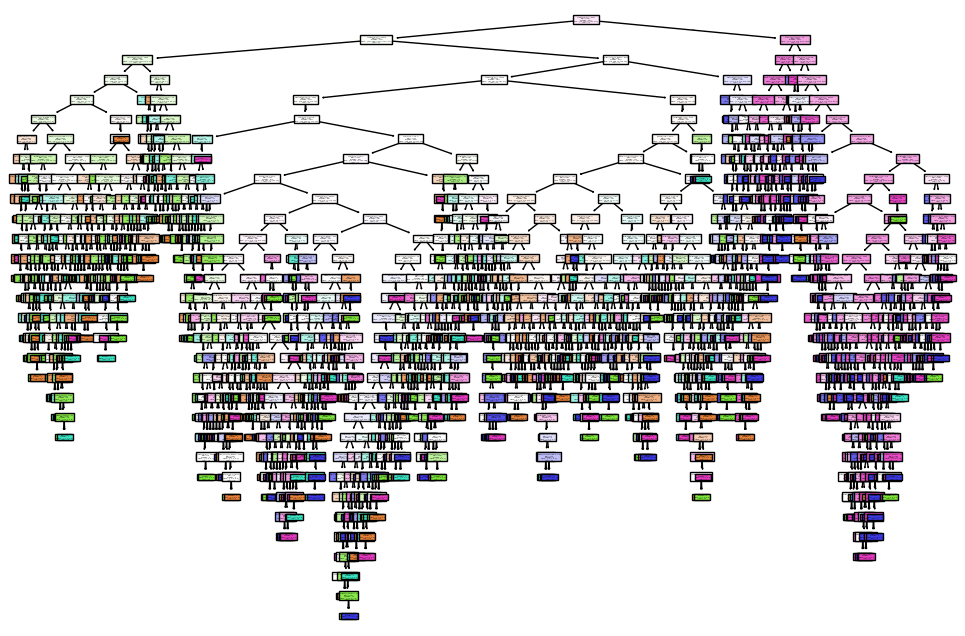

In [12]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()